# House Price Prediction
This notebook demonstrates the preprocessing steps and linear regression for predicting house prices using machine learning. We will cover data loading, cleaning, exploratory data analysis, and feature engineering.

## Introduction
In this project, we aim to predict house prices based on various features. The dataset used includes several attributes of houses, such as size, location, number of rooms, etc. The goal is to preprocess the data to make it suitable for machine learning models and make some predictions from the model that we will create

## Data Loading and importing packages
First, we will load the dataset into a pandas DataFrame. This will allow us to easily manipulate and analyze the data.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns 
import scipy.stats as sci
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("housing.csv") # Reading the dataset

## Data Cleaning
Next, we will clean the data by handling missing values, removing duplicates, and addressing any inconsistencies.

In [4]:
df.shape 

(20640, 10)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.dropna(inplace=True) # Dropped null values

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
# Garbage value check
for i in df.select_dtypes(include="object").columns :
    print(df[i].value_counts())
    print("***"*10)

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64
******************************


## Exploratory Data Analysis
We will visualize the data to understand its distribution and identify any patterns or outliers.

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Figure size 2000x1000 with 0 Axes>

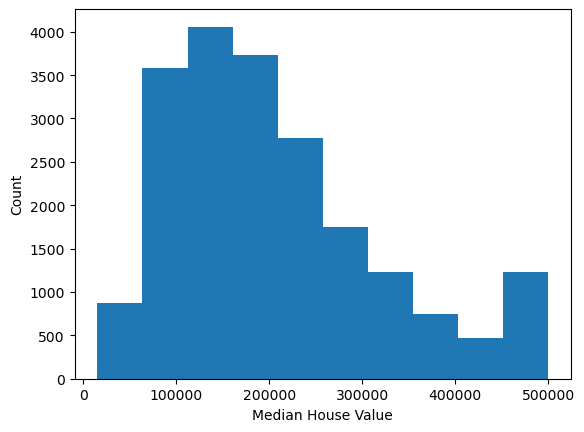

<Figure size 2000x1000 with 0 Axes>

In [11]:
plt.hist(df["median_house_value"])
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.figure(figsize=(20,10))

Text(0, 0.5, 'Price')

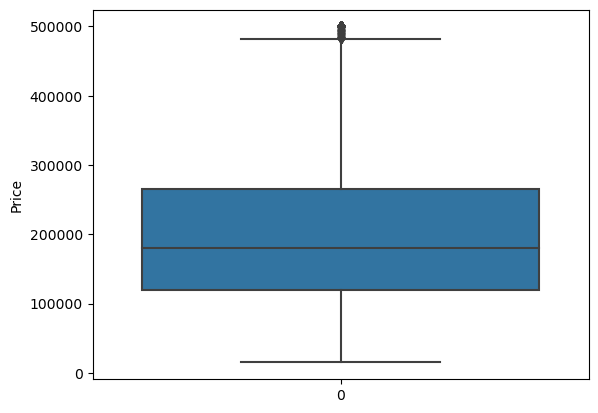

In [12]:
sns.boxplot(df["median_house_value"])
plt.ylabel("Price")

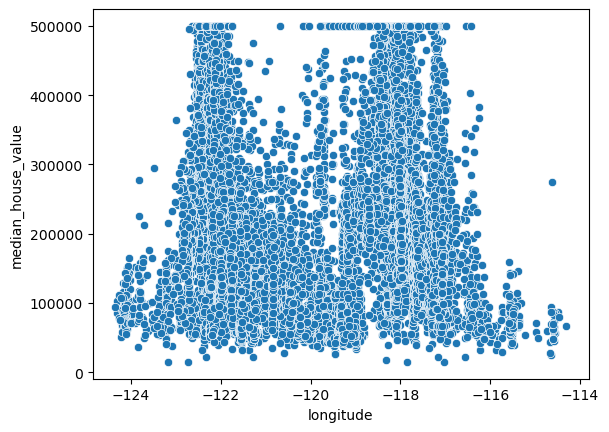

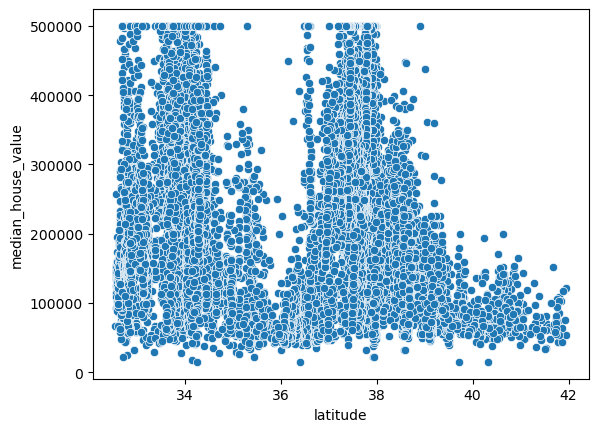

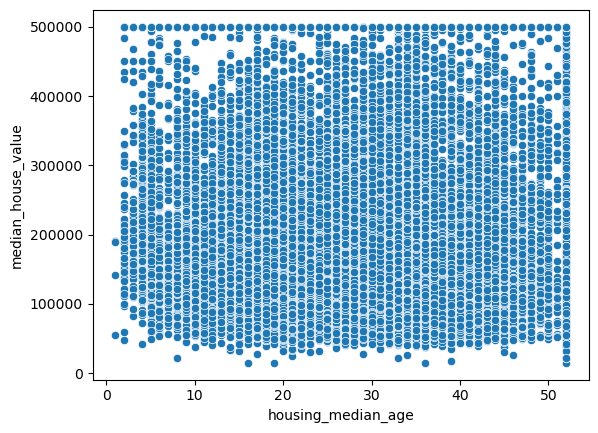

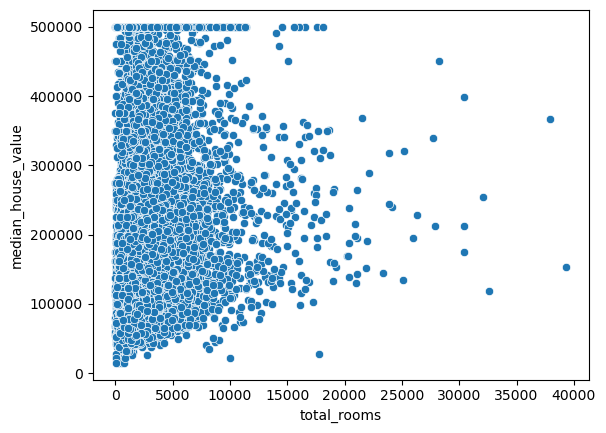

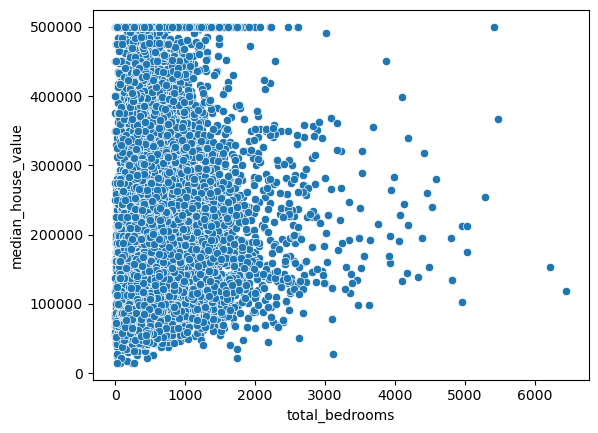

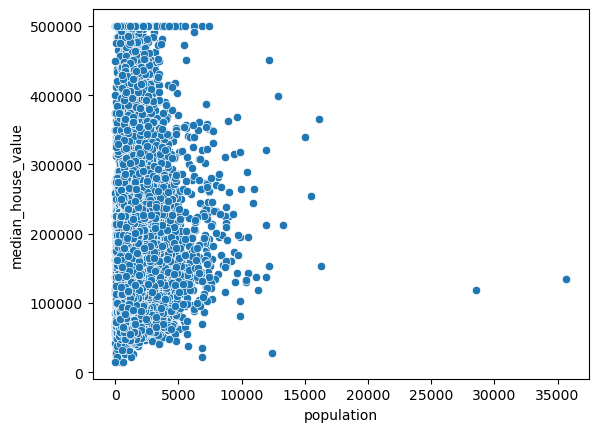

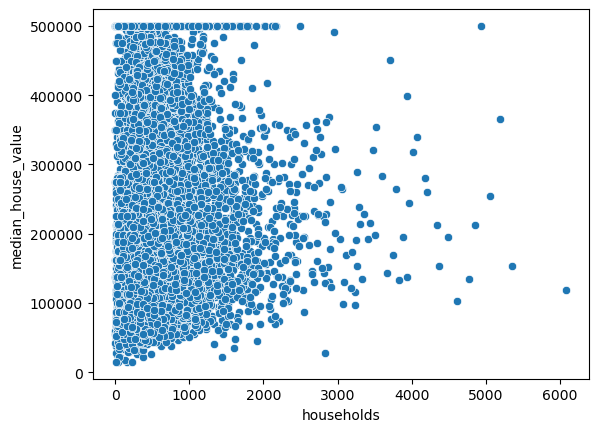

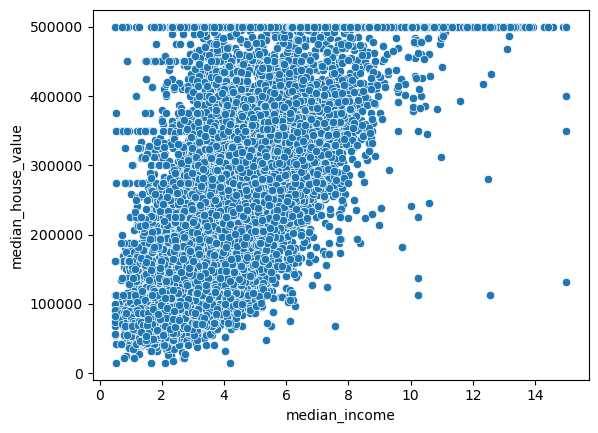

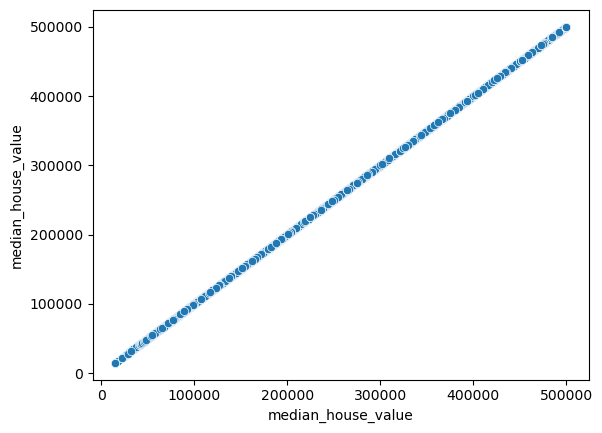

In [13]:
for i in ["longitude","latitude","housing_median_age", "total_rooms","total_bedrooms","population",	"households","median_income", "median_house_value"]:
    sns.scatterplot(data=df, x=i, y= "median_house_value")
    plt.show()

In [14]:
def remove_outliers(df, columns):
    df_cleaned = df.copy()
    
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

In [15]:
columns_to_check = ["longitude", "latitude", "housing_median_age", "total_rooms", 
                     "total_bedrooms", "population", "households", "median_income", "median_house_value"]

In [16]:
df_cleaned = remove_outliers(df, columns_to_check)

In [17]:
df_cleaned.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000
mean,-119.615090,35.716089,29.657379,2071.602069,426.680878,1148.708981,399.249402,3.577614,185327.295862
std,2.005492,2.173731,12.218904,1023.792361,200.455468,548.663279,185.928287,1.446461,92030.433835
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.782500,33.940000,19.000000,1348.000000,282.000000,753.000000,267.000000,2.482100,112500.000000
50%,-118.710000,34.405000,30.000000,1932.000000,401.000000,1086.000000,378.500000,3.395800,169200.000000
75%,-118.030000,37.750000,38.000000,2685.000000,555.000000,1504.000000,520.000000,4.500000,240300.000000
max,-114.490000,41.950000,52.000000,5675.000000,1053.000000,2717.000000,906.000000,8.015800,457800.000000


<Axes: >

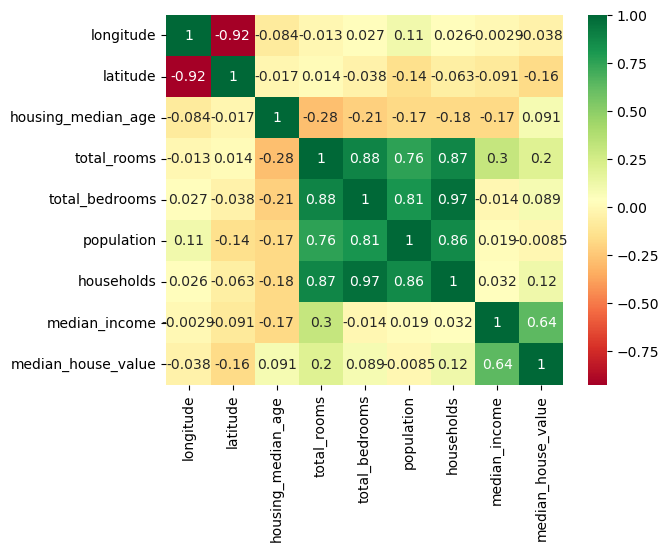

In [18]:
sns.heatmap(df_cleaned.select_dtypes(include="number").corr() , annot= True,cmap=sns.color_palette("RdYlGn", as_cmap=True))

In [19]:
sci.kstest(df_cleaned["median_house_value"],cdf="norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=14999.0, statistic_sign=-1)

In [20]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(["median_house_value"],axis=1)
y = df_cleaned["median_house_value"]

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X ,y,test_size=0.2)  # We splited the data as training set and testing set

In [22]:
train_data = X_train.join(y_train)

In [23]:
pd.get_dummies(train_data.ocean_proximity)  # Using dummy variables to process the non numerical data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(["ocean_proximity"],axis=1)

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9553,-120.64,37.38,21.0,3157.0,637.0,2268.0,620.0,2.5670,70400.0,0,1,0,0,0
219,-122.21,37.79,35.0,1745.0,409.0,1143.0,386.0,2.8750,143800.0,0,0,0,1,0
19829,-119.38,36.56,14.0,3965.0,804.0,1945.0,733.0,2.6906,95300.0,0,1,0,0,0
19951,-119.35,36.22,29.0,2051.0,351.0,915.0,343.0,3.1944,106800.0,0,1,0,0,0
12024,-117.46,33.94,26.0,2481.0,620.0,2411.0,552.0,1.7059,85800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,-122.12,37.82,26.0,2269.0,317.0,918.0,313.0,6.6657,364500.0,0,0,0,1,0
13894,-116.35,34.13,9.0,1969.0,406.0,805.0,349.0,1.5491,62300.0,0,1,0,0,0
10605,-117.81,33.67,9.0,3279.0,530.0,1447.0,510.0,7.4581,296600.0,1,0,0,0,0
1351,-121.94,38.03,27.0,1654.0,478.0,1141.0,420.0,1.4871,87100.0,0,1,0,0,0


<Axes: >

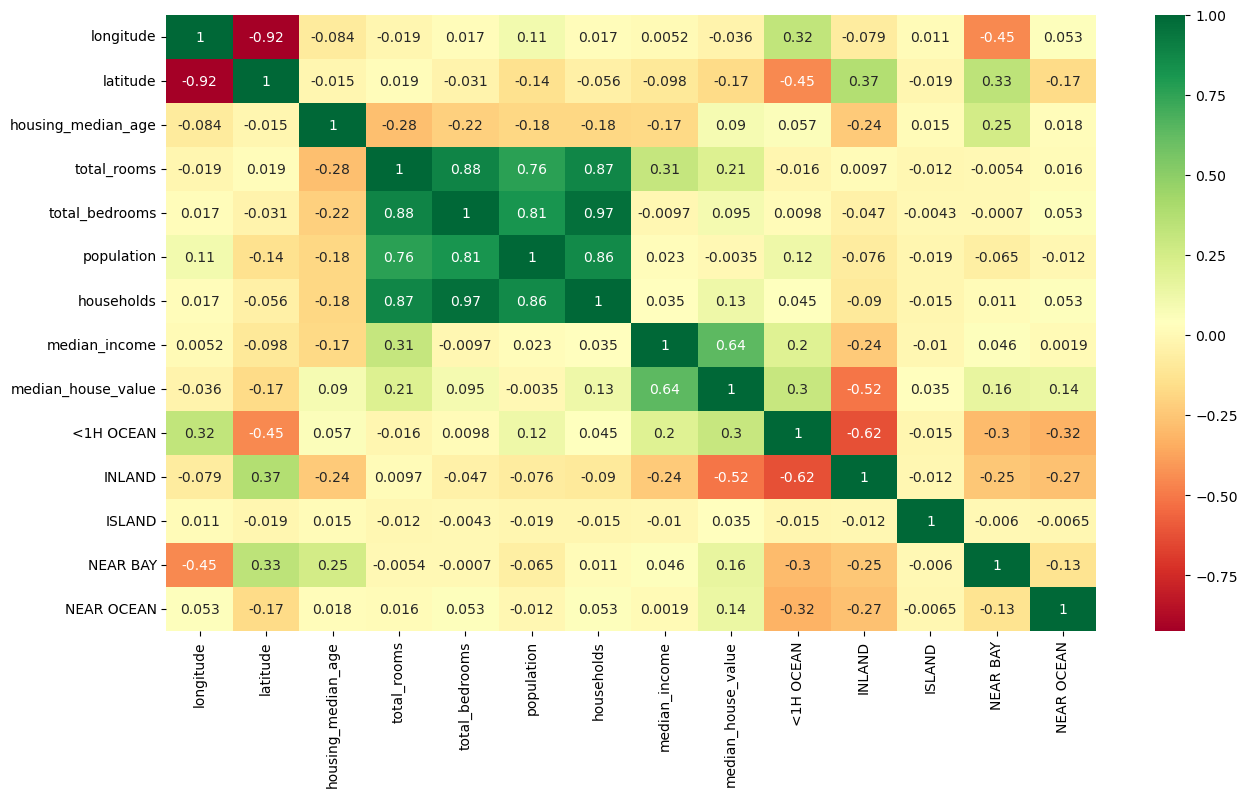

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot= True,cmap=sns.color_palette("RdYlGn", as_cmap=True))

## Feature Engineering
In this section, we will create new features that could help improve the predictive power of our machine learning models.

In [26]:
train_data["bedroom_ratio"]= train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"]=train_data["total_rooms"] / train_data["households"]

<Axes: >

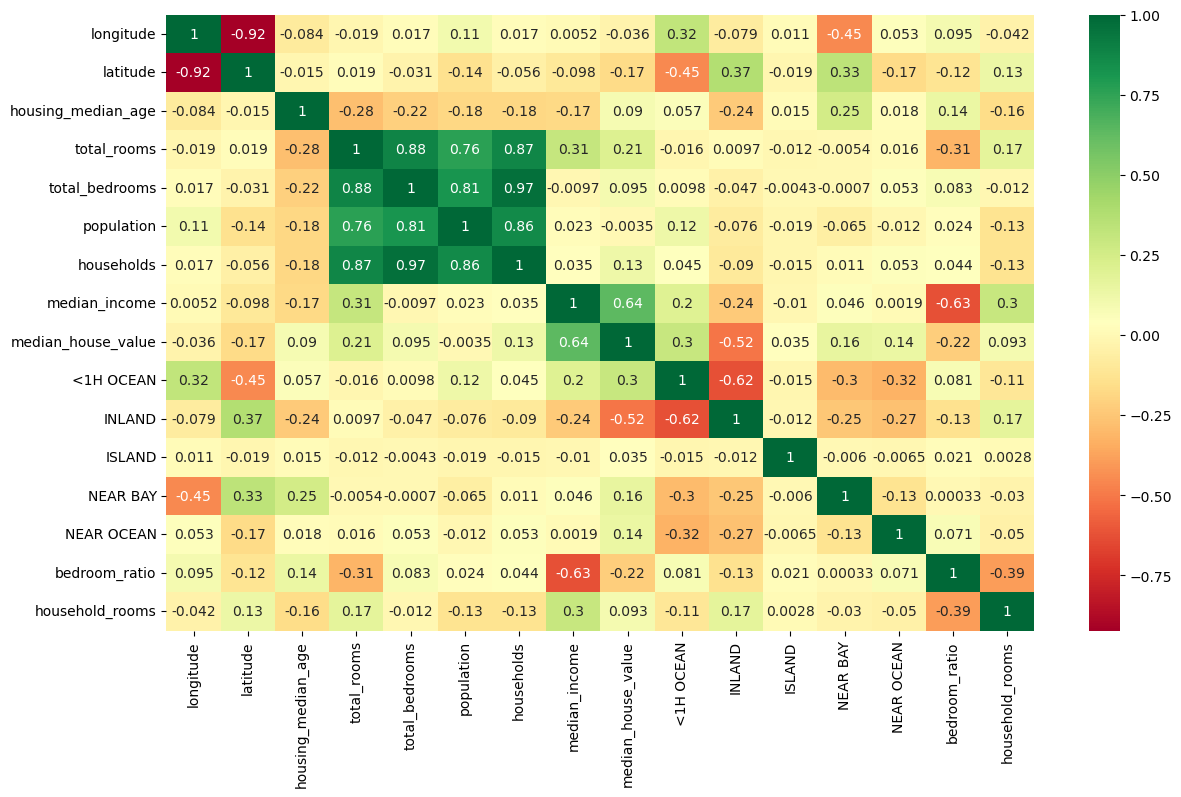

In [27]:
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(),annot=True,cmap=sns.color_palette("RdYlGn", as_cmap=True))

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train , y_train = train_data.drop(["median_house_value"],axis=1) , train_data["median_house_value"]


lm = LinearRegression()
lm.fit(X_train , y_train)

LinearRegression()

In [29]:
lm.coef_

array([-2.55308853e+04, -2.38381453e+04,  8.77046971e+02,  1.48917833e+00,
        6.74511204e+01, -6.56367548e+01,  1.32010289e+02,  4.03429447e+04,
       -2.00310405e+04, -5.33499517e+04,  1.27922555e+05, -3.15043637e+04,
       -2.30371990e+04,  2.15213233e+05,  1.39456156e+03])

In [30]:
cdf = pd.DataFrame(lm.coef_ , X_train.columns,columns=["Coefficients"])
print(cdf)

                     Coefficients
longitude           -25530.885335
latitude            -23838.145259
housing_median_age     877.046971
total_rooms              1.489178
total_bedrooms          67.451120
population             -65.636755
households             132.010289
median_income        40342.944688
<1H OCEAN           -20031.040523
INLAND              -53349.951708
ISLAND              127922.554970
NEAR BAY            -31504.363712
NEAR OCEAN          -23037.199027
bedroom_ratio       215213.233425
household_rooms       1394.561561


In [31]:
test_data = X_test.join(y_test)
pd.get_dummies(test_data.ocean_proximity)
test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(["ocean_proximity"],axis=1)
test_data["bedroom_ratio"]= test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"]=test_data["total_rooms"] / test_data["households"]

In [32]:
X_test , y_test = test_data.drop(["median_house_value"],axis=1),test_data["median_house_value"]

In [33]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
10344,-117.66,33.62,16.0,4065.0,661.0,1962.0,636.0,6.2177,1,0,0,0,0,0.162608,6.391509
3784,-118.38,34.16,46.0,2609.0,593.0,1055.0,585.0,3.3177,1,0,0,0,0,0.227290,4.459829
11102,-117.88,33.85,26.0,3924.0,781.0,2332.0,725.0,3.7772,1,0,0,0,0,0.199032,5.412414
7892,-118.07,33.88,18.0,2436.0,375.0,1303.0,386.0,6.1968,1,0,0,0,0,0.153941,6.310881
10228,-117.93,33.87,45.0,1006.0,230.0,1237.0,237.0,3.3472,1,0,0,0,0,0.228628,4.244726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,-122.45,37.66,35.0,2738.0,509.0,1545.0,493.0,5.3446,0,0,0,0,1,0.185902,5.553753
7059,-118.04,33.93,36.0,1726.0,332.0,1293.0,310.0,4.3849,1,0,0,0,0,0.192352,5.567742
13886,-115.75,35.23,5.0,208.0,78.0,132.0,56.0,2.5333,0,1,0,0,0,0.375000,3.714286
14292,-117.13,32.74,50.0,1527.0,338.0,728.0,322.0,2.6250,0,0,0,0,1,0.221349,4.742236


In [34]:
predictions = lm.predict(X_test)
print(predictions) 

[279432.52416812 251530.81257409 191701.04762472 ...  41140.77193583
 193072.26066989 181237.62654036]


Text(0, 0.5, 'Actual Median House Value')

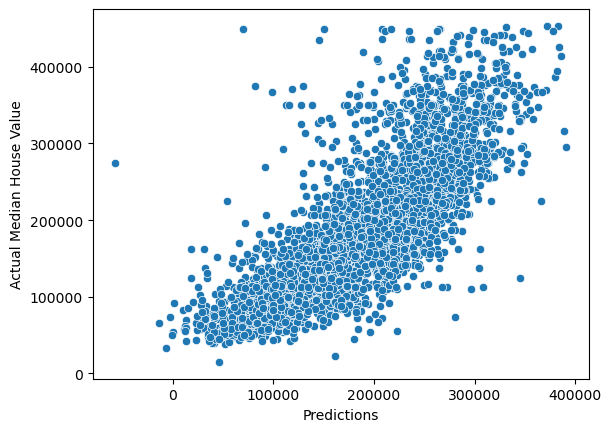

In [35]:
sns.scatterplot(x=predictions , y= y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Median House Value")

In [36]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
import math

In [37]:
print("Mean Absolute Error : " , mean_absolute_error(y_test ,predictions))
print("Mean Squared Error : " , mean_squared_error(y_test ,predictions))
print("Root Mean Squared Error : " , math.sqrt(mean_squared_error(y_test ,predictions)))
print("R Squared : " , r2_score(y_test , predictions))

Mean Absolute Error :  42068.289149027805
Mean Squared Error :  3270081284.5345554
Root Mean Squared Error :  57184.62454659081
R Squared :  0.6133661245202837


<Figure size 2000x1000 with 0 Axes>

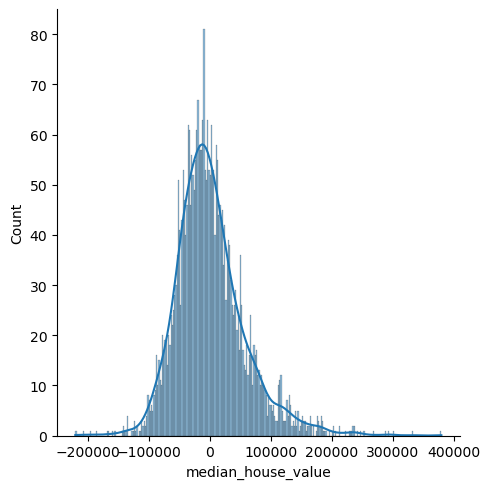

<Figure size 2000x1000 with 0 Axes>

In [38]:
residuals = y_test-predictions
sns.displot(residuals,bins=300,kde= True,)
plt.figure(figsize=(20,10))

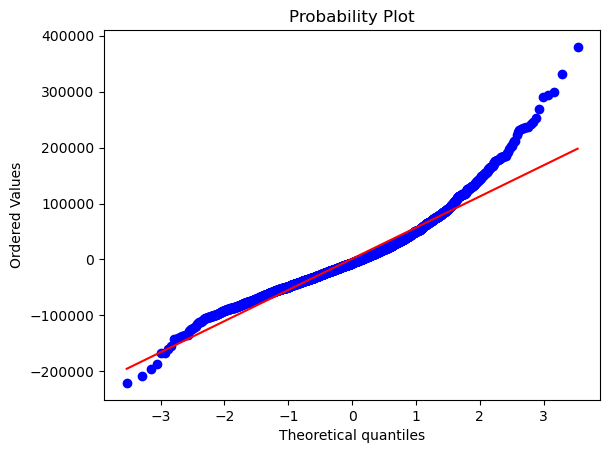

In [39]:
import pylab
sci.probplot(residuals , dist="norm",plot=pylab)
pylab.show()

## Checking Linear Regression Assumptions
### 1 - Examination of Residuals
### 2 - No Multicollinearity
### 3 - Homoscedasticity
### 4 - No Autocorrelation




<Figure size 1200x800 with 0 Axes>

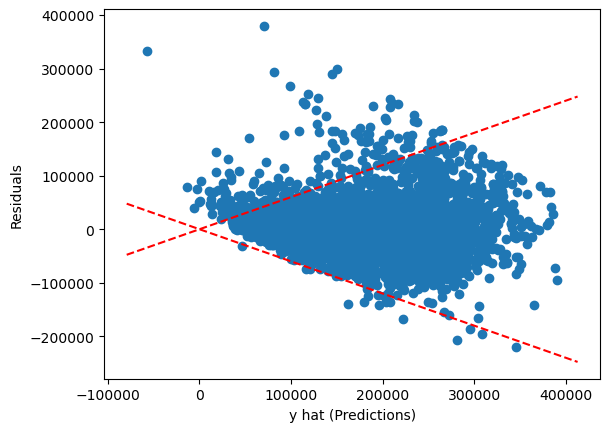

<Figure size 1200x800 with 0 Axes>

In [40]:
plt.scatter(x=predictions , y=residuals)

slope = .6
intercept = 0

x_vals = np.array(plt.gca().get_xlim())
y_vals_upper = slope * x_vals + intercept
y_vals_lower = -slope * x_vals + intercept

plt.plot(x_vals, y_vals_upper, 'r--', label='Cone upper bound')
plt.plot(x_vals, y_vals_lower, 'r--', label='Cone lower bound')
plt.xlabel("y hat (Predictions)")
plt.ylabel("Residuals")
plt.figure(figsize=(12,8))

In [41]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [42]:
## Breusch-Pagan Test for Homoscedasticity

X_test_with_const = sm.add_constant(X_test)
bp_test = het_breuschpagan(residuals, X_test_with_const)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))  

{'Lagrange multiplier statistic': 177.65977531347158, 'p-value': 7.043153988289082e-30, 'f-value': 13.341682155691554, 'f p-value': 2.4741569812336703e-31}


In [43]:
## Durbin Watson test for Autocorrelation

from statsmodels.stats.stattools import durbin_watson 
db_test = durbin_watson(resids=residuals)
print("Durbin-Watson Test Statistic : " , db_test)



Durbin-Watson Test Statistic :  1.8985197342373017


In [44]:
## Multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_with_const = sm.add_constant(X_train.select_dtypes(include="number"))

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

print(vif_data)

               feature        VIF
0                const   0.000000
1            longitude  17.469389
2             latitude  19.898224
3   housing_median_age   1.288346
4          total_rooms  18.202018
5       total_bedrooms  34.505736
6           population   4.314657
7           households  30.669056
8        median_income   2.606309
9            <1H OCEAN        inf
10              INLAND        inf
11              ISLAND        inf
12            NEAR BAY        inf
13          NEAR OCEAN        inf
14       bedroom_ratio   3.533651
15     household_rooms   1.930404


## Conclusion



Overall, our analysis demonstrated that certain features, such as location, size, and number of rooms, significantly influence house prices. By preprocessing the data, applying linear regression, and validating the assumptions, we were able to achieve predictions.
